# 4.9 Task Part 2

## 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path
path = r'C:\Users\Dudab\Oct 2023 - Instacart Analysis'

In [3]:
# Importing 'ords_prods_custs_merge' data set

ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merge.pkl'))

In [4]:
# Checking data frame

ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Last_Name,Gender,State,Age,date_joined,number_of_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
ords_prods_custs_merge.shape

(32404859, 32)

In [6]:
# It appears I misspelled "dependents" when naming the 'number_of_dependents' column. I will first fix this.

ords_prods_custs_merge.rename(columns = {'number_of_dependants' : 'number_of_dependents'}, inplace = True)

## 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### I did the steps already in a different notebook but will recreate them here again.

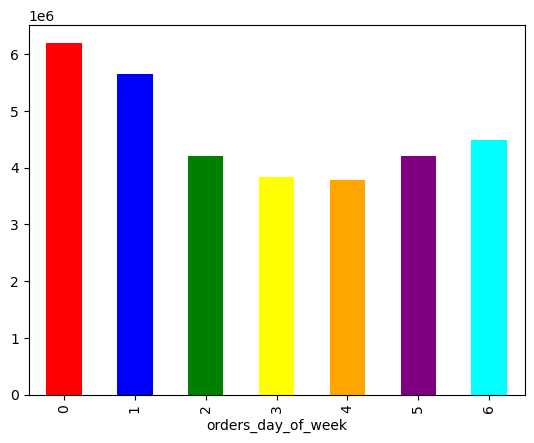

In [7]:
# Creating a bar chart, sorted, and with color.

bar = ords_prods_custs_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan'])

In [9]:
# Saving the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

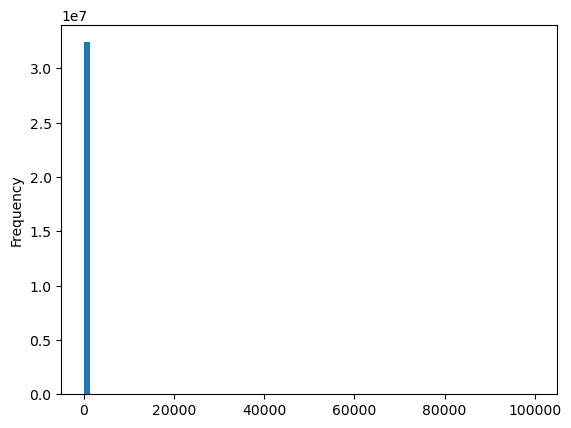

In [10]:
# Creating a histogram

hist = ords_prods_custs_merge['prices'].plot.hist(bins = 70)

In [11]:
# Saving the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


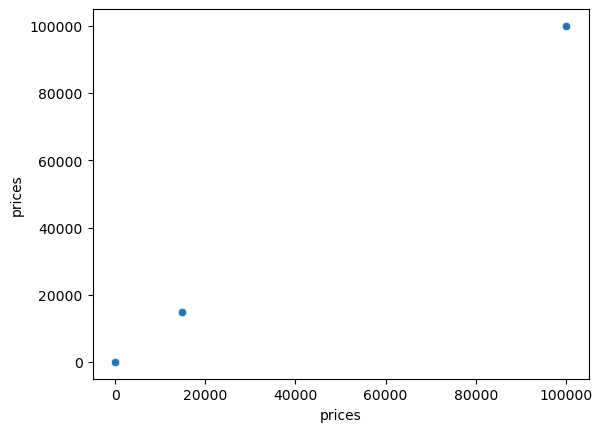

In [12]:
# Creating a scatterplot

sctplt = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_custs_merge)

In [14]:
# Saving the scatterplot

sctplt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sctplt_prices.png'))

In [15]:
# Creating a 70/30 split in the data frame to create a subset to make the line chart from

np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs_merge)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# Store 70% of the sample in the data frame 'big'

big = ords_prods_custs_merge[dev]

In [18]:
# Store 30% of the sample in the data frame 'small'

small = ords_prods_custs_merge[~dev]

In [19]:
# Checking then number of rows in the two sample sets

len(ords_prods_custs_merge)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
# Creating smaller data frame with only needed columns for line chart

df_2 = small[['orders_day_of_week','prices']]

In [22]:
# Checking output of new data frame

df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


In [23]:
df_2.shape

(9721098, 2)

C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

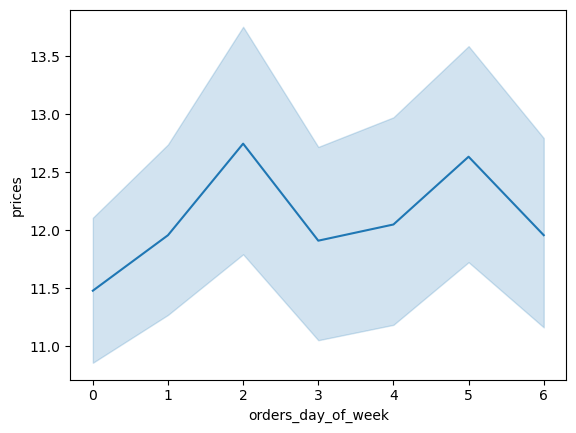

In [24]:
# Creating line chart from 'small' sample set

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [25]:
# Saving the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

## 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
## In a markdown cell beneath your histogram, describe what the histogram demonstrates.

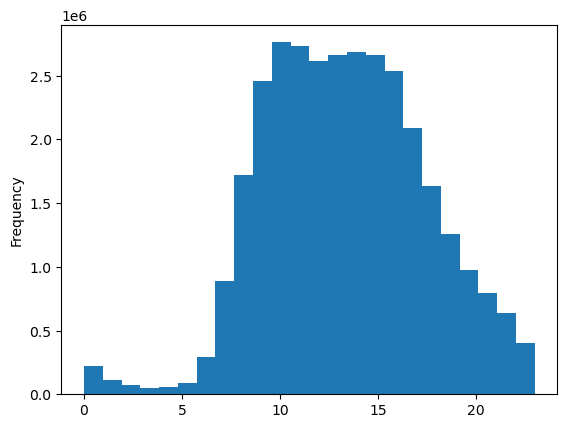

In [26]:
# Creating a histogram on 'order_hour_of_day' column using 24 bins for 24 hours in a day

hist2 = ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 24)

### The histogram illustrates a low volume of orders during the early morning hours (1 to 7 a.m.). Order numbers start to rise in the mid-morning, reaching a peak around 11 a.m., and remain consistently high until approximately 5p.m. Afterward, they gradually decline through the evening hours.

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

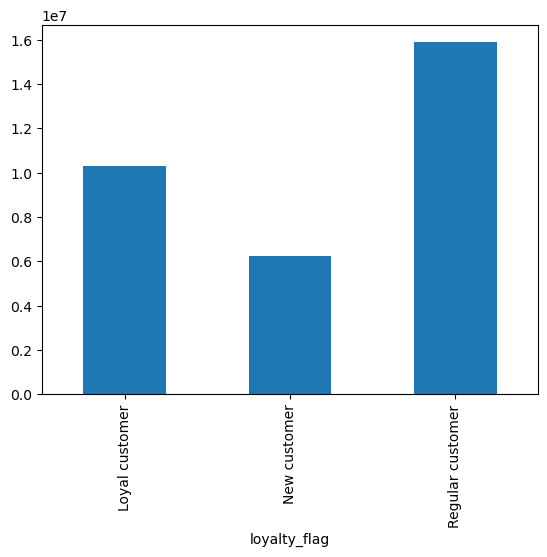

In [27]:
# Creating bar chart from 'loyalty_flag' column

bar2 = ords_prods_custs_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

### The bar chart indicates the presence of approximately 16 million regular customers, 10 million loyal customers, and 6 million new customers.

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [28]:
# Creating smaller data frame with only needed columns for line chart

df_1 = small[['order_hour_of_day','prices']]

In [29]:
# Checking output of new data frame

df_1.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


In [30]:
df_1.shape

(9721098, 2)

C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

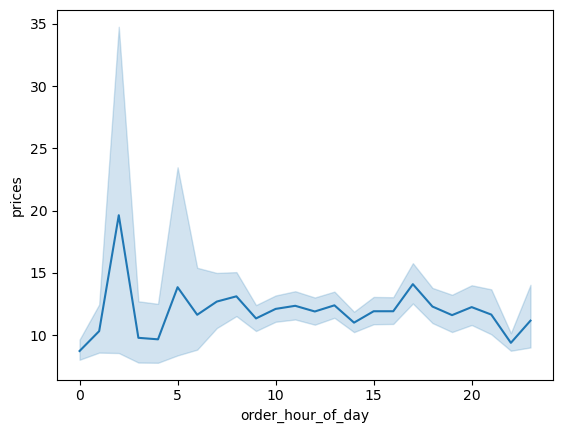

In [32]:
# Creating line chart from 'small' sample set

line1 = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices')

### The most expensive items are purchased during late evening, nighttime, and early morning hours. Interestingly, this pattern contrasts with the timing of peak order placements, as there are fewer orders during late night and early morning, with a higher concentration of orders occurring in the mid-morning to early afternoon.

## 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

In [33]:
# Creating smaller data frame with only needed columns for line chart

df_3 = small[['Age', 'number_of_dependents']]

In [34]:
# Checking output of new data frame

df_3.head()

,Age,number_of_dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


In [35]:
df_3.shape

(9721098, 2)

C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

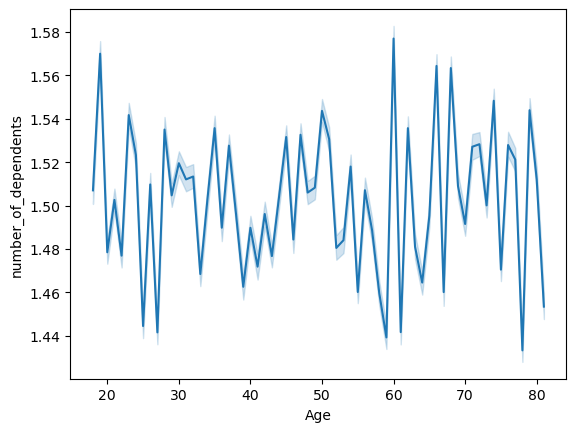

In [36]:
# Creating line chart from 'small' sample set

line2 = sns.lineplot(data = df_3, x = 'Age',y = 'number_of_dependents')

### There appears to be minimal variation in the number of dependents based on customer age. The majority of customers, irrespective of their age, typically have 1 to 2 dependents.

## 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dudab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


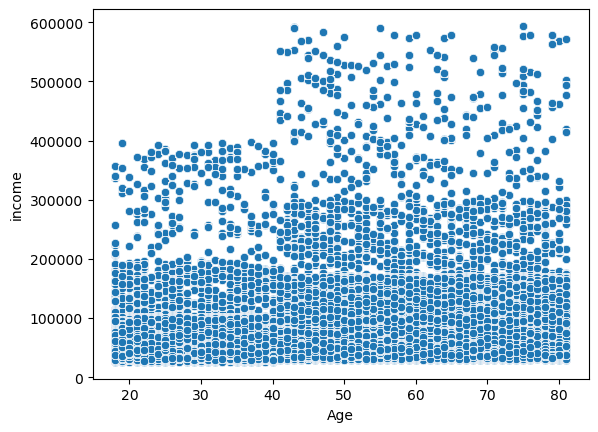

In [37]:
# Creating scatterplot of the entire merged data frame

sctrplt2 = sns.scatterplot(x= 'Age', y = 'income', data = ords_prods_custs_merge)

### The depicted scatterplot indicates a uniform and widespread distribution of incomes of 200,000 or less across all age groups. Individuals aged 40 and above predominantly fall within the income range of 200,000 to 300,000. Incomes ranging from 300,000 to 400,000 are evenly distributed across all age groups. Notably, incomes within the 400,000 to 600,000 range are concentrated exclusively among those aged 40 and above.

## 8. Export your visualizations as “.png” files in your relevant project folder.

In [38]:
# Saving the histogram (hist2)

hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [39]:
# Saving bar chart (bar2)

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [40]:
# Saving line graph (line1)

line1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_by_hour.png'))

In [41]:
# Saving line graph (line2)

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_and_dependents.png'))

In [42]:
# Saving scatterplot (sctrplt2)

sctrplt2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sctrplt_age_and_income.png'))

## 9. Save your notebook from part 2 of this Exercise’s task.

In [43]:
#I'm also going to export the data frame again because I changed the name of a column and want that reflected in the saved pkl file.

ords_prods_custs_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merge.pkl'))